In [120]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import cross_validation
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


In [130]:
random.seed(100)
data = pd.read_csv('train.csv')

In [3]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
dat_tr, dat_te = train_test_split(data, test_size=0.20, random_state=42)

In [14]:
logreg = LogisticRegression(C=1e5)
logregmodel = logreg.fit(dat_tr.iloc[:, [1, 51, 101, 151, 201, 251, 301, 351, 
                                           401, 451, 501, 551, 601, 651, 701,
                                          751]], dat_tr.iloc[:, 0])

In [15]:
rss =((logregmodel.predict(dat_tr.iloc[:, [1, 51, 101, 151, 201, 251, 301, 351, 
                                           401, 451, 501, 551, 601, 651, 701,
                                          751]]) ==
           dat_tr['label']))
rss.mean()

0.49300595238095241

In [50]:
# standardizing
dat_trstand = dat_tr.copy()
dat_trstand.iloc[:, 1:] = preprocessing.scale(dat_tr.iloc[:, 1:])


In [73]:
# np.linalg.eig(dat_trstand.iloc[:, 1:])
pca = PCA
pca_result = pca(200).fit(dat_tr.iloc[:, 1:])

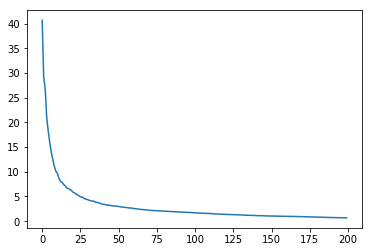

In [74]:
plt.plot(pca_result.explained_variance_)
# pca_result.explained_variance_


In [104]:
?pca

In [105]:
X_pca = pca_result.transform(dat_tr.iloc[:, 1:])
princomp = pd.DataFrame(X_pca)
logistic_pca = LogisticRegression('l2').fit(princomp, dat_tr['label'])


In [113]:
X_pca_test = pca_result.transform(dat_te.iloc[:, 1:])
princomp_test = pd.DataFrame(X_pca_test)

np.round(np.mean(logistic_pca.predict(X_pca_test) == dat_te['label']), 3)


0.78700000000000003

In [115]:
import tensorflow as tf


ModuleNotFoundError: No module named 'tensorflow.python'

In [116]:
images = data.iloc[:,1:].values
images = images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

print('images({0[0]},{0[1]})'.format(images.shape))

images(42000,784)


In [117]:
image_size = images.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


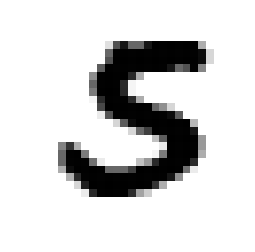

In [122]:
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(images[99])

In [153]:
labels_flat = data['label'].values.ravel()
                   


In [180]:
labels_count = np.unique(labels_flat)

In [181]:
labels_count

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [182]:
labels_flat

array([1, 0, 1, ..., 7, 6, 9])

In [183]:
labels_flat

array([1, 0, 1, ..., 7, 6, 9])

In [184]:
np.put(np.zeros(10),5,1)

In [185]:
targets = np.array(labels_flat).reshape(-1)
labels = np.eye(10)[targets]

In [186]:
VALIDATION_SIZE = 6300
validation_images = images[:VALIDATION_SIZE]
validation_labels = labels[:VALIDATION_SIZE]

train_images = images[VALIDATION_SIZE:]
train_labels = labels[VALIDATION_SIZE:]